# Percentage Cloud Coverage using Sentinel-Hub Statistical API 

In [1]:
import os
import yaml
from munch import munchify

### _Setup configuration and environment_

In [2]:
# define repo name and get root working directory
repo = 'statistical'
root_path = os.getcwd()[ 0 : os.getcwd().find( repo ) + len ( repo )]

# get path to configuration files
cfg_path = os.path.join( root_path, 'cfg' )
cfg_path = os.path.join( cfg_path, 'sentinel-2' )

In [3]:
# get path to configuration files
cfg_path = os.path.join( root_path, 'cfg' )
cfg_path = os.path.join( cfg_path, 'sentinel-2' )
cfg_path

'C:\\Users\\crwil\\Documents\\GitHub\\sentinelhub\\apis\\statistical\\cfg\\sentinel-2'

In [4]:
# get pathname to configuration file
cfg_file = os.path.join( cfg_path, 's2-cloud-percentage.yml' )

In [5]:
# print contents of configuration file
with open( cfg_file ) as f:
    print ( f.read() )

request:
    evalscript: |       
            //VERSION=3
            function setup() {
                return {
                    input: [{
                        bands: [
                            "CLM",
                            "dataMask"
                        ]
                    } ],
                    output: [
                    {
                        id: "data",
                        bands: 1
                    },
                    {
                        id: "dataMask",
                        bands: 1
                    }]
                }
            }
            function evaluatePixel(samples) {
                return {
                    data: [samples.CLM],
                    dataMask: [samples.dataMask]
                }
            }
    inputs:
        - collection: SENTINEL2_L2A    
          mosaic:
            order: leastRecent
responses:



In [6]:
# load cfg file using yaml parser
with open( cfg_file, 'r' ) as f:
    config = munchify( yaml.safe_load( f ) )
config

Munch({'request': Munch({'evalscript': '//VERSION=3\nfunction setup() {\n    return {\n        input: [{\n            bands: [\n                "CLM",\n                "dataMask"\n            ]\n        } ],\n        output: [\n        {\n            id: "data",\n            bands: 1\n        },\n        {\n            id: "dataMask",\n            bands: 1\n        }]\n    }\n}\nfunction evaluatePixel(samples) {\n    return {\n        data: [samples.CLM],\n        dataMask: [samples.dataMask]\n    }\n}\n', 'inputs': [Munch({'collection': 'SENTINEL2_L2A', 'mosaic': Munch({'order': 'leastRecent'})})]}), 'responses': None})

### _Replicate use case results taken from Sentinel-Hub documentation_

In [7]:
from sentinelhub import CRS

# define min and max latlons
coords = 413307.629466, 4957434.513693, 415152.151806, 4958814.807431
crs = CRS( 32633 )

resolution = 10

In [8]:
# define aggregation timeframe
from datetime import datetime
timeframe = { 'start' : datetime.strptime('2020-11-01', '%Y-%m-%d'), 
              'end' : datetime.strptime('2020-12-31', '%Y-%m-%d') }

In [9]:
# create instance of shclient class
from statisticalapi import Client
client = Client( config )

In [10]:
# get utm bbox
bbox = client.getBoundingBox( coords, src_crs=crs )
print ( bbox, bbox.crs.value )

413307.629466,4957434.513693,415152.151806,4958814.807431 32633


In [11]:
# submit request
response = client.getStatistics( [ timeframe ], resolution=resolution, bbox=bbox )

In [12]:
response._dfs[ 0 ]

,id,interval_from,interval_to,data_B0_min,data_B0_max,data_B0_mean,data_B0_stDev,data_B0_sampleCount,data_B0_noDataCount
0,geom_0,2020-11-01,2020-11-02,1.0,1.0,1.000000,0.000000,25392,0
1,geom_0,2020-11-06,2020-11-07,0.0,0.0,0.000000,0.000000,25392,0
2,geom_0,2020-11-11,2020-11-12,0.0,0.0,0.000000,0.000000,25392,0
3,geom_0,2020-11-21,2020-11-22,0.0,0.0,0.000000,0.000000,25392,0
4,geom_0,2020-11-26,2020-11-27,0.0,1.0,0.312539,0.463528,25392,0
5,geom_0,2020-12-01,2020-12-02,0.0,1.0,0.280088,0.449042,25392,0
6,geom_0,2020-12-06,2020-12-07,1.0,1.0,1.000000,0.000000,25392,0
7,geom_0,2020-12-11,2020-12-12,0.0,1.0,0.984444,0.123750,25392,0
8,geom_0,2020-12-16,2020-12-17,1.0,1.0,1.000000,0.000000,25392,0
9,geom_0,2020-12-21,2020-12-22,1.0,1.0,1.000000,0.000000,25392,0


### _Validate cloud percentage results by extracting image time series via Process API_

In [13]:
# get pathname to configuration file
cfg_path = cfg_path.replace( 'statistical', 'process' )
cfg_file = os.path.join( cfg_path, 's2-timeseries-rgb.yml' )

In [14]:
# load cfg file using yaml parser
with open( cfg_file, 'r' ) as f:
    config = munchify( yaml.safe_load( f ) )

In [15]:
# create instance of shclient class
from processapi import Client
client = Client( config )

In [16]:
# get time series
response = client.getTimeSeries ( bbox, timeframe, resolution )
response._df

,rgb.tif,falseColor.tif,time
0,"[[[2.238, 2.392, 2.642], [2.292, 2.414, 2.686]...","[[[2.16, 2.238, 2.392], [2.184, 2.292, 2.414],...",2020-11-01 10:08:26+00:00
1,"[[[0.04675, 0.13975, 0.12175], [0.058, 0.142, ...","[[[0.029, 0.04675, 0.13975], [0.057, 0.058, 0....",2020-11-06 10:08:23+00:00
2,"[[[0.043, 0.14025, 0.1265], [0.05525, 0.1475, ...","[[[0.042, 0.043, 0.14025], [0.05825, 0.05525, ...",2020-11-11 10:08:24+00:00
3,"[[[0.0275, 0.12275, 0.11925], [0.0405, 0.1285,...","[[[0.02975, 0.0275, 0.12275], [0.053, 0.0405, ...",2020-11-21 10:08:23+00:00
4,"[[[0.07875, 0.18825, 0.17575], [0.0895, 0.1807...","[[[0.0875, 0.07875, 0.18825], [0.111, 0.0895, ...",2020-11-26 10:08:21+00:00
5,"[[[0.01575, 0.047, 0.0485], [0.009, 0.05175, 0...","[[[0.006, 0.01575, 0.047], [0.011, 0.009, 0.05...",2020-12-01 10:08:20+00:00
6,"[[[2.562, 2.674, 2.752], [2.556, 2.662, 2.766]...","[[[2.556, 2.562, 2.674], [2.556, 2.556, 2.662]...",2020-12-06 10:08:19+00:00
7,"[[[0.761, 0.873, 0.992], [0.6775, 0.8245, 0.92...","[[[0.967, 0.761, 0.873], [0.913, 0.6775, 0.824...",2020-12-11 10:08:17+00:00
8,"[[[1.677, 1.763, 1.814], [1.686, 1.791, 1.874]...","[[[1.683, 1.677, 1.763], [1.714, 1.686, 1.791]...",2020-12-16 10:08:16+00:00
9,"[[[1.141, 1.156, 1.344], [1.237, 1.283, 1.339]...","[[[1.075, 1.141, 1.156], [1.136, 1.237, 1.283]...",2020-12-21 10:08:19+00:00


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

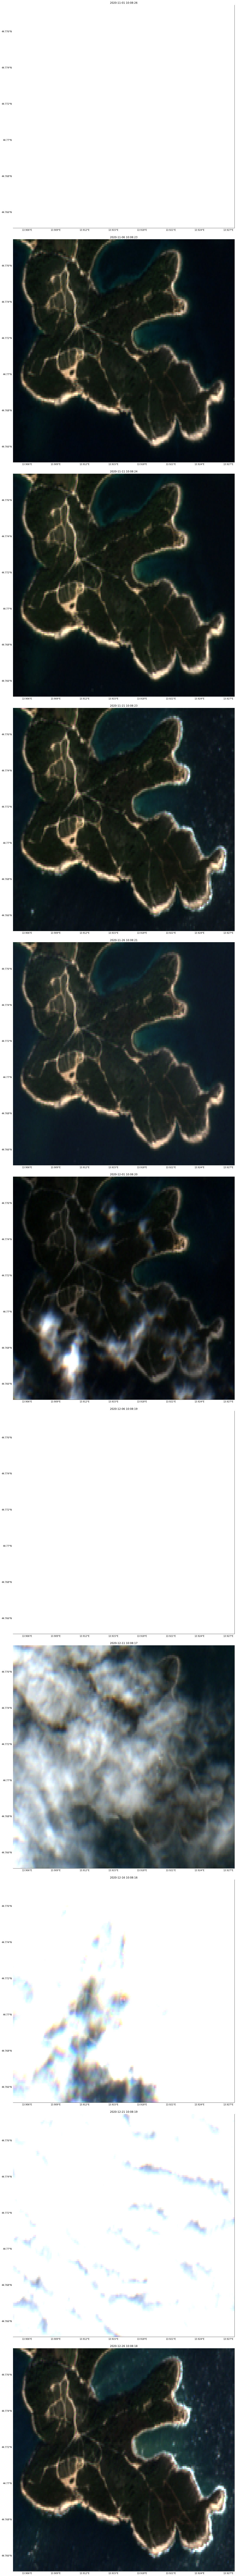

In [17]:
# plot time series
response.plotImages( 'rgb.tif', alpha={ 'data' : 1.0, 'grid' : 0.0 } )